# Test for H20 Lines
In Spectra that have artifacts, check to see if they align with water features or not.

hd202206-1 spectra to start with.

got h2o spectra at 0 45 and 90 degrees to see if that makes a difference

In [13]:
from __future__ import division, print_function
from __future__ import absolute_import, unicode_literals

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Seaborn, useful for graphics
import seaborn as sns

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline


# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.mpl
import bokeh.plotting

# This enables SVG graphics inline.  There is a bug, so uncomment if it works.
%config InlineBackend.figure_formats = {'svg',}

# This enables high resolution PNGs. SVG is preferred, but has problems
# rendering vertical and horizontal lines
#%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
#rc = {'lines.linewidth': 1, 
#      'axes.labelsize': 14, 
#      'axes.titlesize': 16, 
#      'axes.facecolor': 'DFDFE5'}
#sns.set_context('notebook', rc=rc)
#sns.set_style('darkgrid', rc=rc)

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

Loading BokehJS ...

# Get Nod Spectra Quicklooks
HD202206-1 that shows artifacts


In [14]:
## This is for an `png` image
from IPython.display import Image
import os
# Compare with figures of combined spectra
image_path = "C:/Users/Jason/Dropbox/PhD/data/HD202206-1/images/"

figs = [0,0,0,0]
for chipnum in range(1,5):
    figname = "quicklook_HD202206-1_{}_reduction.png".format(chipnum)
    img_file = os.path.join(image_path, figname)
    figs[chipnum-1] = Image(filename=(img_file))
    #fig


In [15]:
#data_path = "C:/Users/Jason/Documents/PhD/data/Data/HD202206-1/"
data_path = "C:/Users/Jason/Dropbox/PhD/data/HD202206-1/"


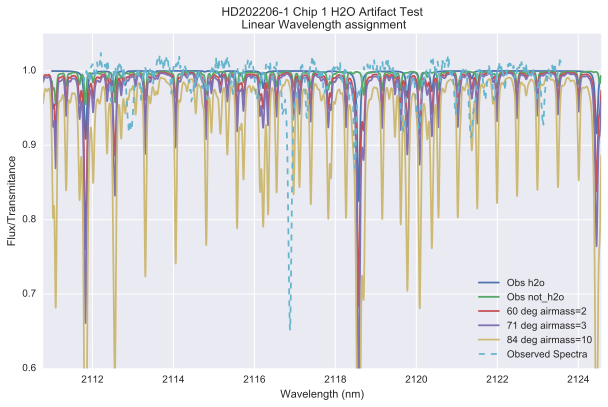

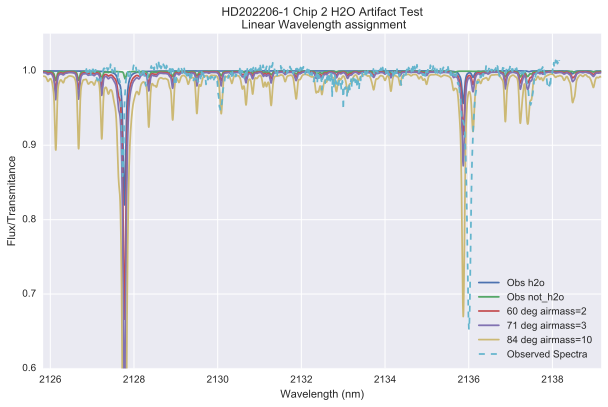

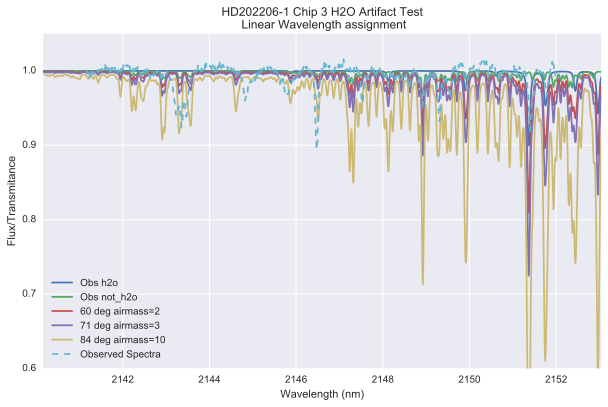

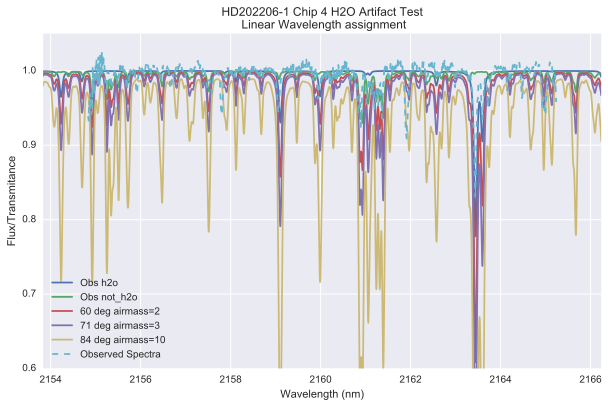

In [16]:
import TelluricSpectra.Obtain_Telluric as obt
#chip2 = "../HD30501_data/1/CRIRE.2012-04-07T00:08:29.976_2.nod.ms.norm.sum.wavecal.fits"
artifact_path = "C:/Users/Jason/Dropbox/PhD/data/tapas-hd202206-1-artifact-testing/"

#tapas_files = ["tapas_2012-07-12T07-08-44_ReqId_10_R-50000_sratio-10_barydone-NO_species-all.ipac", "tapas_2012-07-12T07-08-44_ReqId_12_R-50000_sratio-10_barydone-NO_species-h2o.ipac",
#         "tapas_2012-07-12T07-08-44_ReqId_18_R-50000_sratio-10_barydone-NO_species-noh2o.ipac", "water_spec_at_zenith.ipac", "water_spec_at_45deg.ipac", "water_spec_at_60deg.ipac", 
#               "water_spec_at_71deg.ipac", "water_spec_at_84deg.ipac", "water_spec_at_90deg.ipac"] 

#tapas_labels = ["all", "h2o", "not_h2o", "0 deg", "45 deg", "60 deg", "71 deg", "84 deg", "90 deg"]

tapas_files = ["tapas_2012-07-12T07-08-44_ReqId_12_R-50000_sratio-10_barydone-NO_species-h2o.ipac",
               "tapas_2012-07-12T07-08-44_ReqId_18_R-50000_sratio-10_barydone-NO_species-noh2o.ipac",
               "water_spec_at_60deg.ipac", "water_spec_at_71deg.ipac", "water_spec_at_84deg.ipac",] 

tapas_labels = ["Obs h2o", "Obs not_h2o", "60 deg airmass=2", "71 deg airmass=3", "84 deg airmass=10"]


for chipnum in range(1,5):
    f1 = plt.figure(figsize=(10,6))
    # file = data_path + "CRIRE.2012-07-12T07_19_47.498_{0}.nod.ms.norm.Comb.fits".format(chipnum)
    file = data_path + "CRIRE.2012-07-12T06-54-44.372_{0}.nod.ms.norm.sum.fits".format(chipnum)
    
    # Add tapas spectra
    for i, f in enumerate(tapas_files):
        #tapas_file = artifact_path + f
        tapas_data, tapas_hdr = obt.load_telluric(artifact_path, f)
        #tapas_all_airmass = float(tapas_all_hdr["airmass"])
    
        plt.plot(tapas_data[0], tapas_data[1], label=tapas_labels[i])
    
    # observation spectra    
    data = fits.getdata(file)
    header = fits.getheader(file)
    chipwlmin = header["HIERARCH ESO INS WLEN STRT{}".format(chipnum)] 
    chipwlmax = header["HIERARCH ESO INS WLEN END{}".format(chipnum)]
   
    wl = np.linspace(chipwlmin, chipwlmax, 1024)
    flux = data
  
    
    plt.plot(wl, flux, "--", label="Observed Spectra")
    plt.xlim([chipwlmin-1, chipwlmax+1])
    plt.ylim([0.6,1.05])
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Flux/Transmitance")
    #plt.xlim([2130,2140])
    
    plt.legend(loc=0)
    plt.title("HD202206-1 Chip {} H2O Artifact Test\n Linear Wavelength assignment".format(chipnum))
    
    plt.show()
    #f1.savefig(os.path.join(image_path, "Atrifact_testing_H20_Chip_{0}.png".format(chipnum)), bbox_inches='tight')
    #f1.savefig(os.path.join(image_path, "Atrifact_testing_H20_Chip_{0}.pdf".format(chipnum)), bbox_inches='tight')
    #bokeh.plotting.show(bokeh.mpl.to_bokeh())

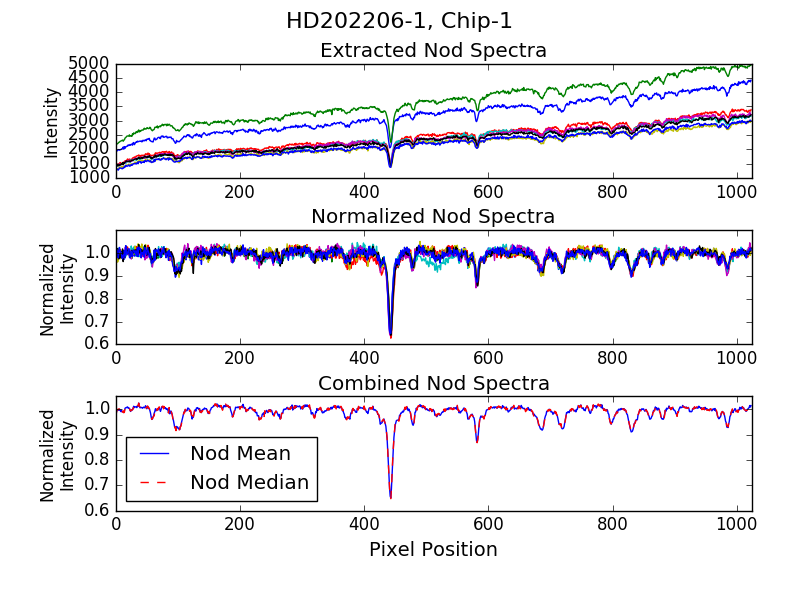

In [17]:
figs[0]

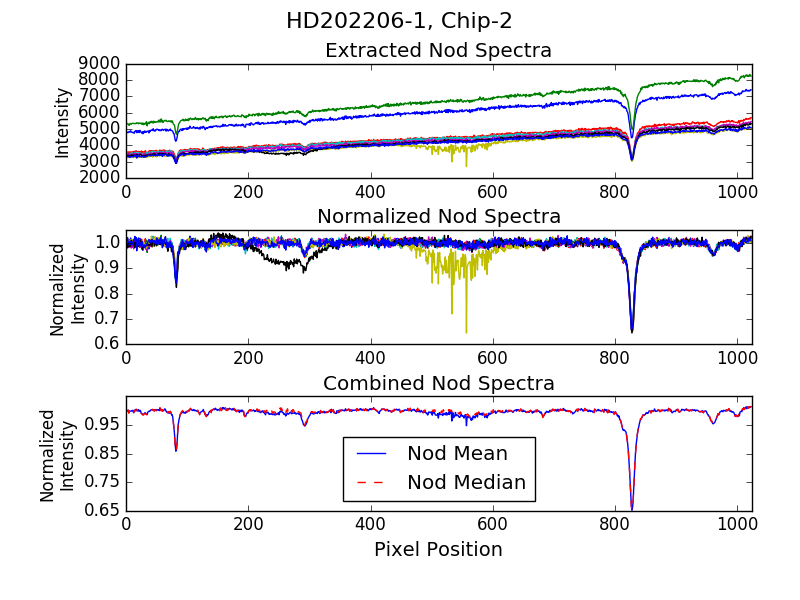

In [18]:
figs[1]

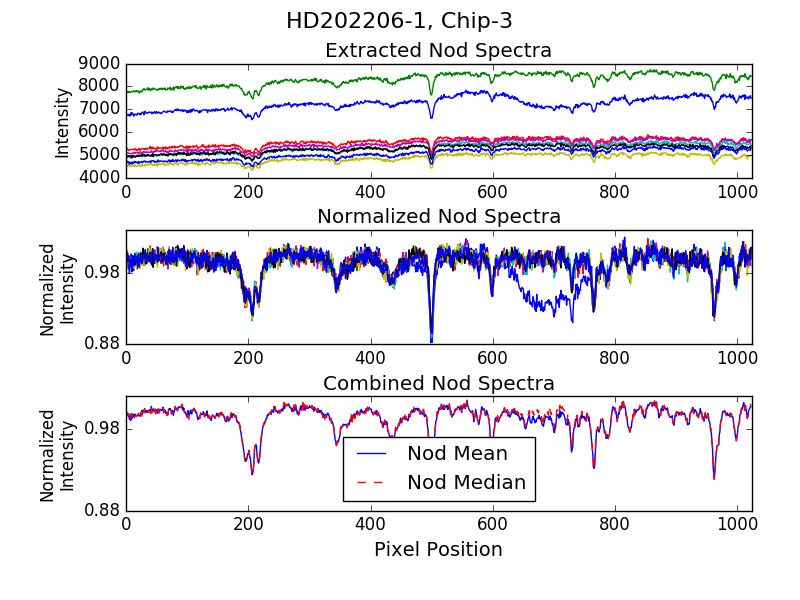

In [19]:
figs[2]

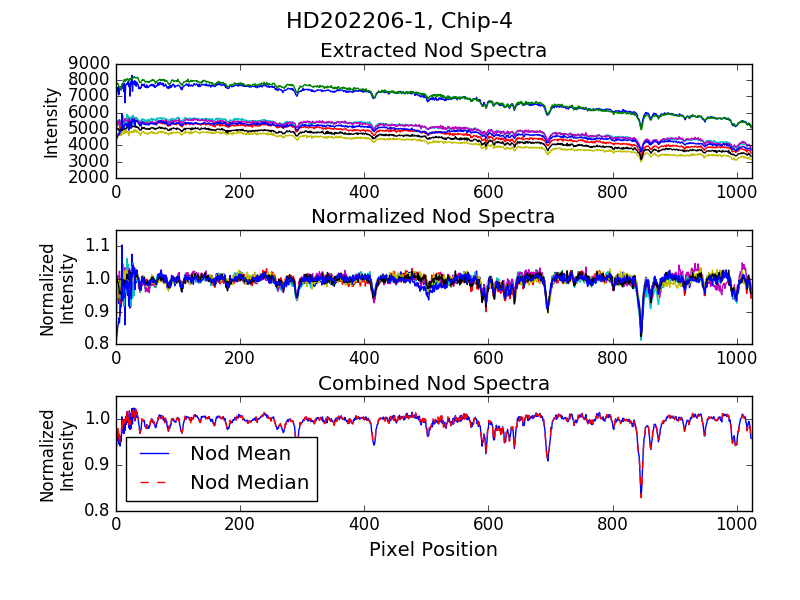

In [20]:
figs[3]